# Análise dos Dados do Enem 2021

## Avalição da Nota de Matemática

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_columns', None)

### Base de Dados

In [2]:
%time Enem_21 = pd.read_csv('./MICRODADOS_ENEM_2021.csv', encoding='ISO-8859-1', sep=';')
Enem_21.head()

CPU times: total: 48.9 s
Wall time: 1min 4s


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


#### Dados filtrados por presença e removido a nota 0

In [3]:
base_Enm_21_Fitro = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_MT'] == 1) & 
                                 (Enem_21.loc[:,'NU_NOTA_MT'] != 0)]

In [4]:
base_Enm_21_Fitro.shape

(2245391, 76)

In [3]:
Ausencia = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_MT'] == 0)]
Ausencia.shape

(1142539, 76)

### Bibliotéca de Funções

<hr>

In [5]:
# Esta função gera um describe da nota, pelas classes da coluna desejada.

def Estat_Desc (clmn_1, clmn_2):
    
    Estat_Desc = pd.DataFrame()
    total = base[base[clmn_1].notnull()][coluna_1].count()
    count_percent = []
    
    
    for k, v in Dicionario_Labels.items():
        Estat_Desc[k] = base.loc[base.loc[:,clmn_1] == v, clmn_2].describe().round(2)
        percentagem = (base.loc[base.loc[:,clmn_1] == v,clmn_2].count() / total)*100
        count_percent.append(percentagem.round(2))
    
    Estat_Desc = Estat_Desc.T
    Estat_Desc.insert(loc = 1, column = 'count_%', value = count_percent)
    Estat_Desc = Estat_Desc.T
    
    print()
    print(titulo)
    return Estat_Desc

In [6]:
# Esta função gera um gráfico Boxplot da nota, pelas classes da coluna desejada.

def Box_Plot (clmn_1, clmn_2):
    
    lst_k = []
    lst_v = []
    
    for k, v in Dicionario_Labels.items():
        lst_k.append(k)
        lst_v.append(v)
        
    plt.figure(figsize=(15,5))
    sbn.boxplot(x=clmn_1, y=clmn_2, showmeans=True, data=base, showfliers=Outliers, order=lst_v)
    plt.title(titulo, fontsize=15)
    plt.xlabel(clmn_1, fontsize=12)
    plt.ylabel(clmn_2, fontsize=12)
    ticks, labels = plt.xticks()
    plt.xticks(ticks, labels=lst_k)
    plt.show

In [7]:
# Esta função gera gráficos de Histograma da nota, pelas classes da coluna desejada.

def Hist_Plot (clmn_1, clmn_2):
        
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    qtd_lnh = 2 if qtd_lnh == 1 else qtd_lnh
    fig, ax = plt.subplots(qtd_lnh, 2, figsize=(12,8), constrained_layout=True)
   
           
    count_k = -1
    lnh_pos = -1
        
    for k, v in Dicionario_Labels.items():
        count_k += 1
                       
        if count_k%2 == 0:
            lnh_pos += 1                       
            ax[lnh_pos,0].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,0].set_title(k)
            ax[lnh_pos,0].set_xlabel(clmn_2, fontsize=7)
            
            
        else:
            ax[lnh_pos,1].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,1].set_title(k)
            ax[lnh_pos,1].set_xlabel(clmn_2, fontsize=7)
            
    plt.show()

In [ ]:
# Avaliação da variação da média por

titulo = ''
coluna_1 = ''                  # Clases
coluna_2 = ''                  # Notas
base = base_Enm_21_Fitro

vrl_k = []
vrl_v = sorted(base[coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
Dicionario_Labels = {}


display(Estat_Desc(coluna_1, coluna_2))

Outliers = True

Box_Plot(coluna_1, coluna_2)

Hist_Plot(coluna_1, coluna_2)

print('=======================================================================================================================')

<hr>

In [ ]:
base_Enm_21_Fitro.isnull().sum()

In [8]:
coluna_2 = 'NU_NOTA_MT'        # Notas de Ciência da Natureza
base = base_Enm_21_Fitro
nota = 'MT'


Avaliação da variação da Nota MT por Faixa Etária.


,<17,17,18,19,20,21,22,23,24,25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,>70
count,234447.00,518186.00,525764.00,260594.00,151791.00,99701.00,70038.00,50851.00,41090.00,32594.00,99061.00,56081.00,40856.00,27119.00,17595.00,10629.00,5704.00,2233.00,747.00,310.00
count_%,10.44,23.08,23.42,11.61,6.76,4.44,3.12,2.26,1.83,1.45,4.41,2.50,1.82,1.21,0.78,0.47,0.25,0.10,0.03,0.01
mean,544.55,543.03,534.21,535.63,537.35,539.03,537.89,535.45,532.02,529.57,525.99,515.87,502.52,490.10,485.67,484.21,482.14,479.70,473.41,464.20
std,102.48,108.06,108.92,113.20,116.77,118.23,117.92,116.84,113.99,112.82,112.49,108.08,102.19,95.28,93.48,92.80,93.69,92.08,84.50,81.33
min,315.50,311.60,311.00,311.80,312.30,310.40,311.20,315.20,312.30,312.60,310.90,312.50,311.20,310.50,312.10,313.20,313.10,314.60,328.70,314.70
25%,459.00,453.60,445.10,443.40,441.90,442.20,441.50,440.20,439.10,438.50,435.30,429.80,423.20,418.00,415.95,414.90,412.80,411.60,410.55,409.25
50%,535.20,528.10,514.30,512.90,512.70,513.70,512.50,510.70,508.95,506.00,501.50,491.40,477.10,466.50,461.70,461.20,457.60,455.80,448.60,448.00
75%,622.35,622.10,611.30,614.50,619.20,621.80,621.70,617.55,611.20,608.40,603.80,587.70,565.82,543.50,536.20,533.80,530.22,527.80,522.90,501.20
max,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,944.10,935.50,915.10,862.70,793.60,742.30


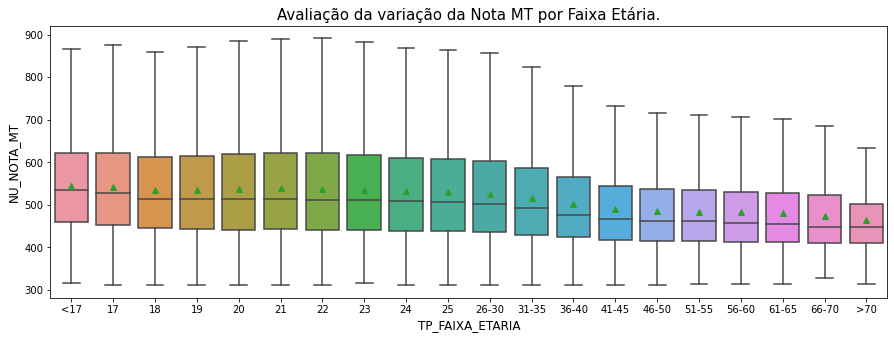

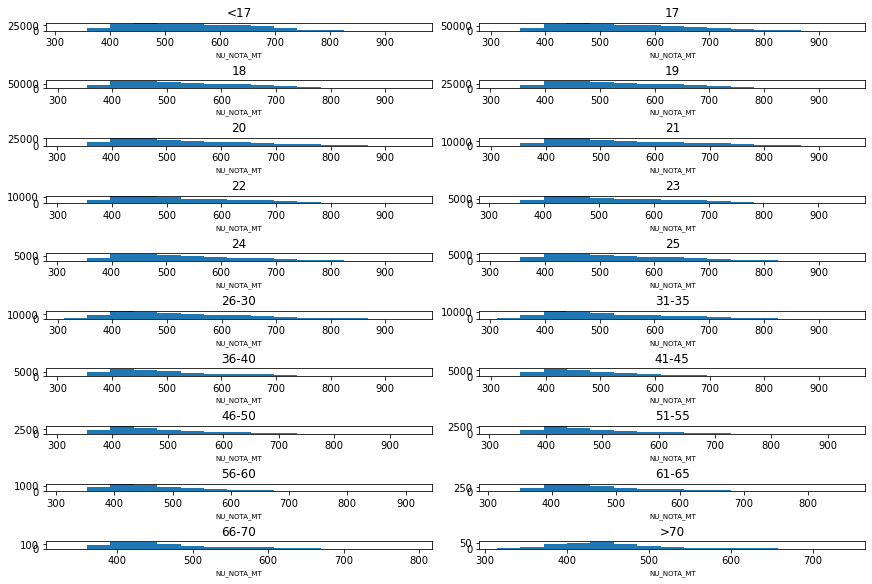




Avaliação da variação da Nota MT por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,1385818.00,859573.00
count_%,61.72,38.28
mean,519.89,559.85
std,103.54,116.42
min,310.40,311.00
25%,437.10,461.90
50%,498.40,548.90
75%,589.30,647.10
max,953.10,953.10


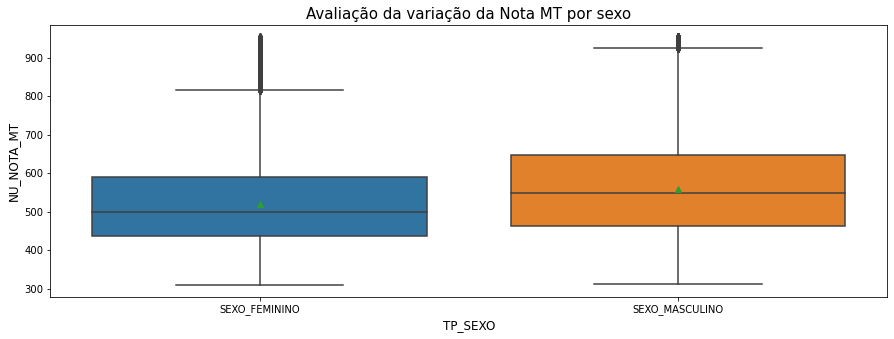

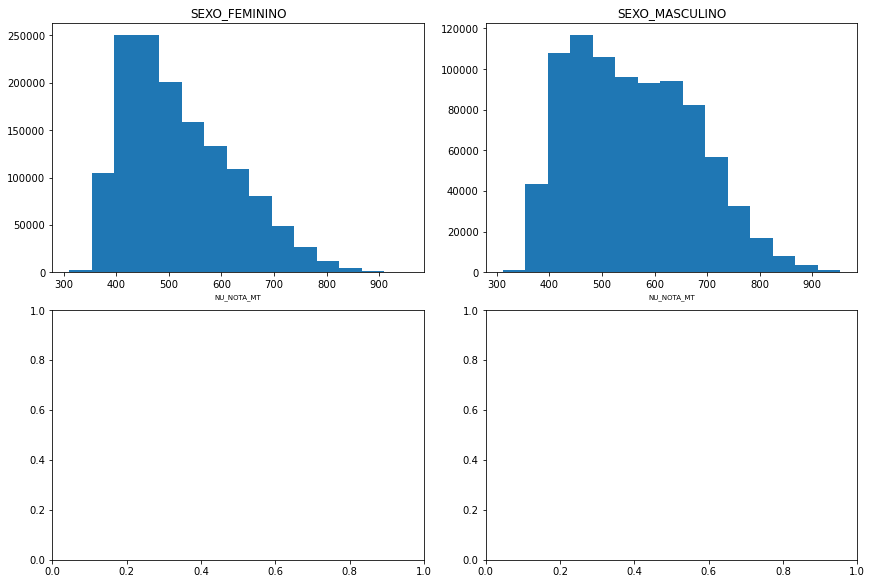




Avaliação da variação da Nota MT por Raça


,Nao declarado,Branca,Preta,Parda,Amarela,Indigena,Nao dispoe da informacao
count,43963.00,982219.00,247383.00,916144.00,45075.00,10605.00,2.00
count_%,1.96,43.74,11.02,40.80,2.01,0.47,0.00
mean,533.07,565.58,501.25,512.34,539.99,474.32,426.80
std,113.98,115.28,92.25,100.28,118.49,80.80,68.59
min,316.40,310.90,311.50,310.50,312.90,310.40,378.30
25%,439.25,469.00,429.60,433.00,443.40,413.70,402.55
50%,508.70,557.60,481.80,490.60,515.10,456.20,426.80
75%,615.20,651.60,559.00,577.70,623.10,515.50,451.05
max,953.10,953.10,953.10,953.10,953.10,905.80,475.30


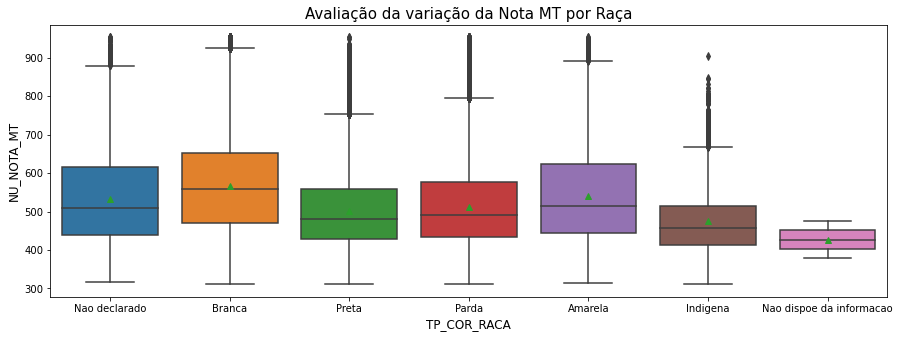

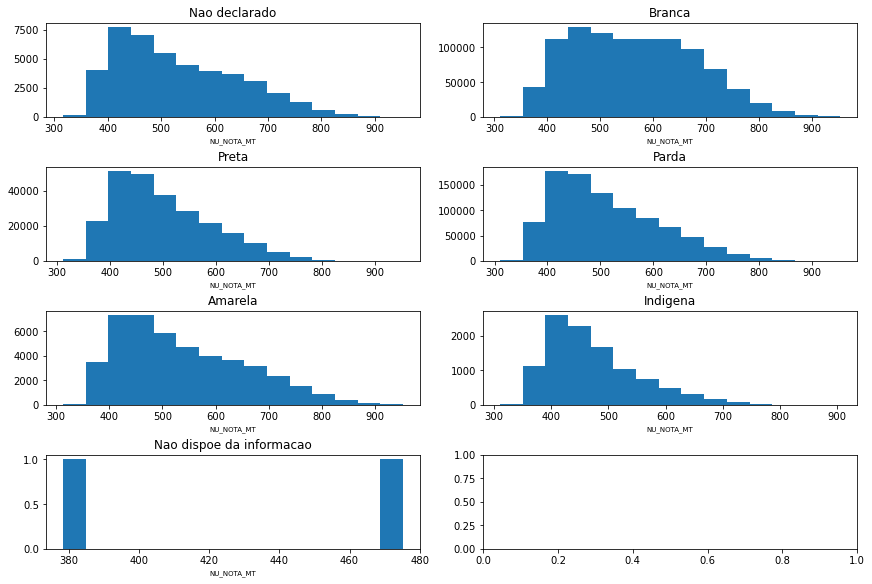




Avaliação da variação da Nota MT por Ano de Conclusão Ensino Médio.


,Nao informado,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,Antes 2007
count,1308349.00,277303.00,158697.00,100276.00,70916.00,50604.00,38987.00,31034.00,24787.00,21011.00,17022.00,15395.00,13861.00,11895.00,11073.00,94181.00
count_%,58.27,12.35,7.07,4.47,3.16,2.25,1.74,1.38,1.10,0.94,0.76,0.69,0.62,0.53,0.49,4.19
mean,528.97,547.53,548.41,548.95,551.23,552.24,546.52,543.67,541.71,540.53,541.11,532.54,532.62,531.82,523.97,518.12
std,105.58,113.28,118.02,120.09,121.24,120.33,118.64,116.63,115.55,115.71,115.20,114.99,114.10,114.26,110.55,107.37
min,311.20,311.90,310.40,311.70,314.20,310.50,312.30,312.20,310.90,314.00,314.30,314.20,312.50,314.70,315.20,311.50
25%,442.50,453.80,450.90,449.50,450.70,451.90,448.10,447.70,447.10,444.95,446.60,438.65,439.30,438.60,434.60,432.00
50%,509.80,531.20,528.40,527.30,529.10,533.10,525.80,524.90,521.80,520.30,521.50,510.30,510.20,509.70,501.20,494.60
75%,604.50,629.10,633.30,635.40,640.70,641.50,633.70,628.30,626.60,625.30,626.00,614.55,615.40,613.60,600.00,592.30
max,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,948.80,933.50,953.10,953.10,953.10,953.10


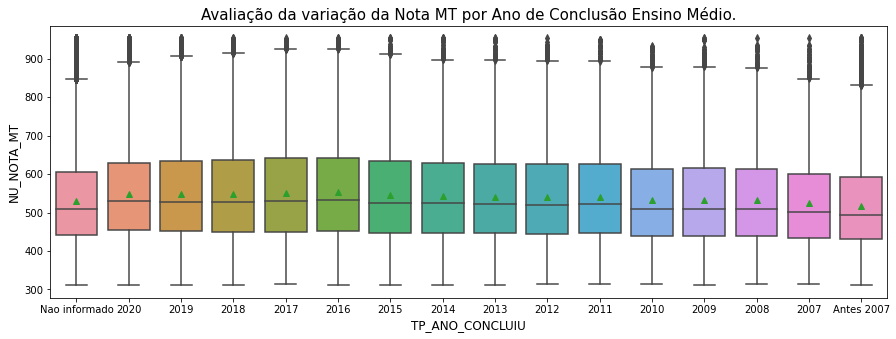

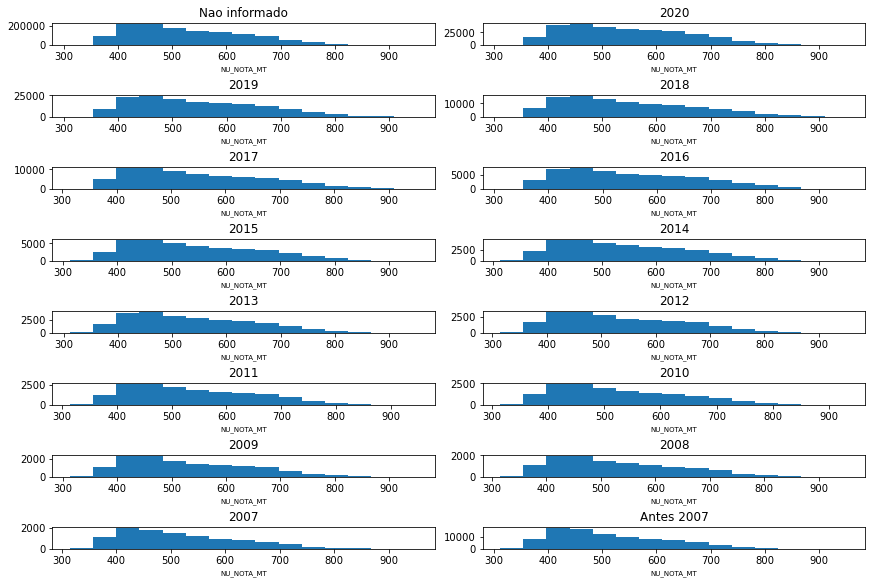




Avaliação da variação da Nota MT por Escola Pública/Privada.


,Nao Respondeu,Publica,Privada
count,1395589.00,670285.00,179517.00
count_%,62.15,29.85,7.99
mean,538.58,508.58,608.17
std,112.00,95.11,114.14
min,310.40,311.80,312.90
25%,446.60,433.00,519.50
50%,519.50,488.70,615.60
75%,619.00,571.30,691.50
max,953.10,953.10,953.10


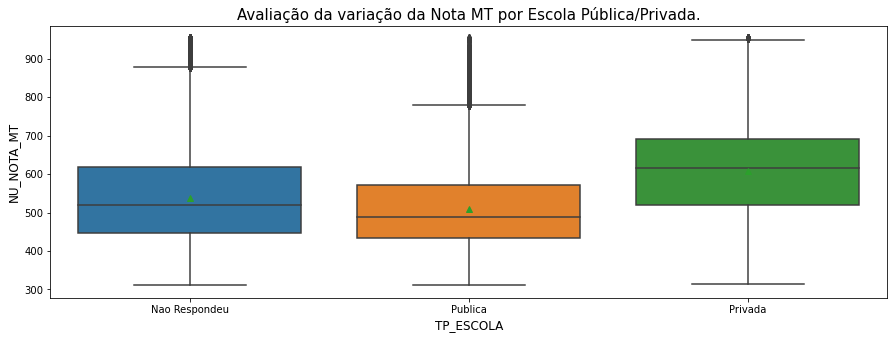

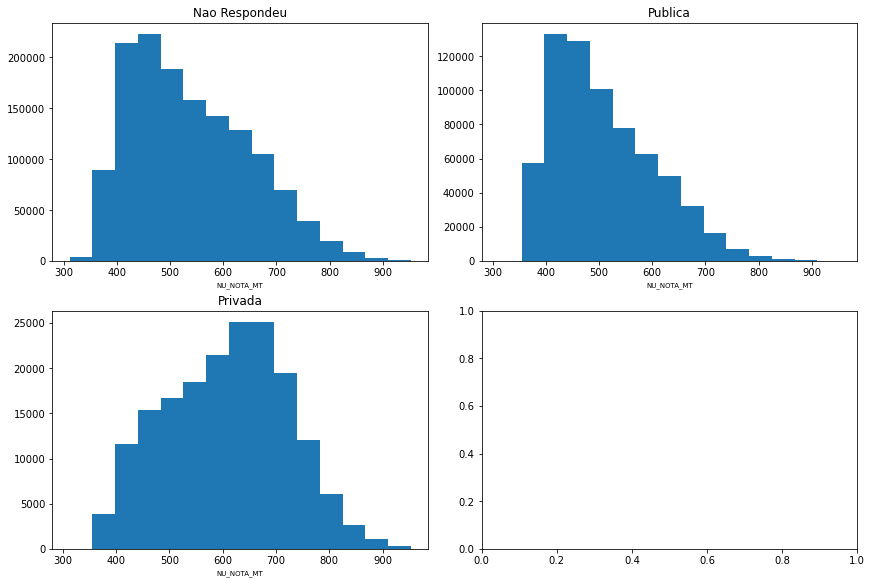




Avaliação da variação da Nota MT por região da aplicação da prova.


,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,12757.00,38773.00,44836.00,13049.00,175326.00,143653.00,45143.00,42186.00,84250.00,85202.00,219924.00,26987.0,35201.00,119686.00,70973.00,131912.00,56786.00,96312.00,158142.00,56490.00,18789.00,4870.00,101109.00,54438.00,37469.00,351273.00,19855.00
count_%,0.57,1.73,2.00,0.58,7.81,6.40,2.01,1.88,3.75,3.79,9.79,1.2,1.57,5.33,3.16,5.87,2.53,4.29,7.04,2.52,0.84,0.22,4.50,2.42,1.67,15.64,0.88
mean,495.79,516.91,486.30,491.45,513.60,521.56,552.39,549.56,527.75,496.25,562.14,529.2,521.13,494.89,518.14,524.40,510.98,549.39,549.76,529.83,506.36,509.91,550.58,557.49,516.92,568.24,506.97
std,88.33,104.66,89.85,91.20,100.97,109.97,117.74,112.57,107.13,94.93,115.17,108.0,103.60,93.07,106.68,106.43,106.00,109.78,112.30,109.18,95.10,96.45,109.38,109.89,104.71,112.44,99.04
min,314.90,312.50,314.30,311.60,310.40,311.90,310.90,312.10,311.70,314.20,312.30,311.4,314.10,311.20,314.50,311.90,312.50,312.50,310.50,315.00,314.60,327.00,314.70,313.50,314.00,311.00,315.50
25%,427.30,434.20,419.20,422.20,433.70,433.80,454.70,456.00,440.80,424.00,465.40,442.7,438.30,423.90,434.10,438.70,429.30,459.50,456.10,441.10,431.60,432.32,460.70,466.30,434.70,475.20,429.20
50%,477.10,493.40,464.00,470.70,491.50,495.20,535.60,535.30,506.50,473.00,552.50,508.2,500.10,472.80,493.50,502.60,484.20,535.60,536.40,508.35,486.40,492.20,539.10,549.00,493.00,563.00,484.20
75%,549.10,584.30,533.70,542.70,579.50,594.00,638.30,632.10,601.80,550.10,648.40,601.8,590.70,548.00,585.70,597.30,573.80,629.20,632.80,606.30,567.20,575.18,630.20,638.80,583.60,651.50,568.85
max,855.70,948.50,953.10,880.20,953.10,953.10,953.10,953.10,953.10,948.80,953.10,953.1,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,933.50,866.30,953.10,953.10,953.10,953.10,948.50


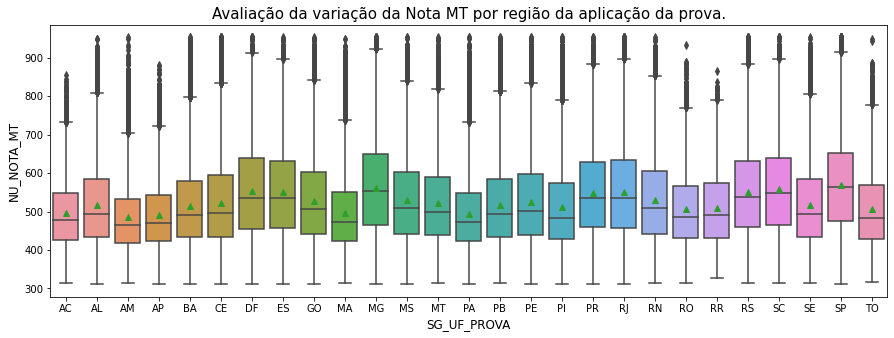

C:\Users\LHST\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


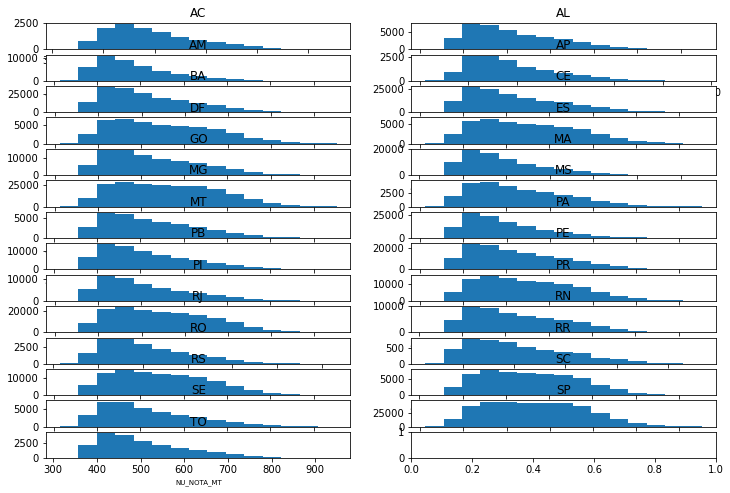




Avaliação da variação da Nota MT por Nível de Estudo do Responsável Homem.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,76754.00,351257.00,282407.00,246384.00,683507.00,247209.00,184225.00,173647.00
count_%,3.42,15.64,12.58,10.97,30.44,11.01,8.20,7.73
mean,471.71,492.41,511.04,522.00,543.12,597.54,613.48,504.71
std,80.04,89.39,97.11,100.47,107.29,117.07,119.16,95.43
min,310.50,310.40,311.20,312.80,311.80,311.60,311.00,312.40
25%,412.90,423.90,434.20,441.10,454.70,502.70,519.40,430.00
50%,453.20,472.50,491.20,504.00,529.30,601.80,622.20,483.80
75%,512.90,545.30,574.60,591.10,621.40,684.00,700.60,565.30
max,953.10,944.10,953.10,953.10,953.10,953.10,953.10,953.10


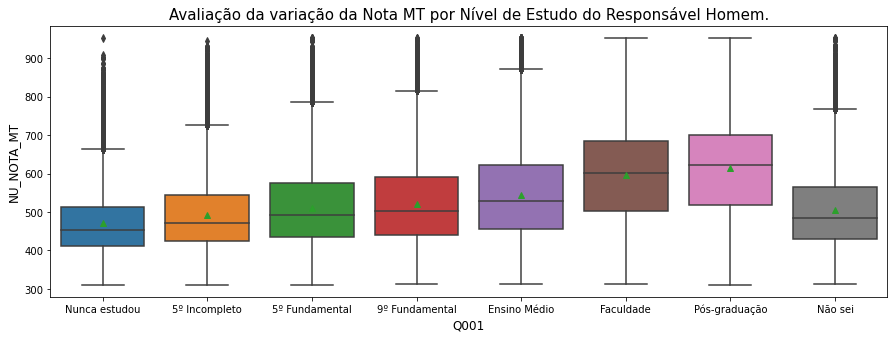

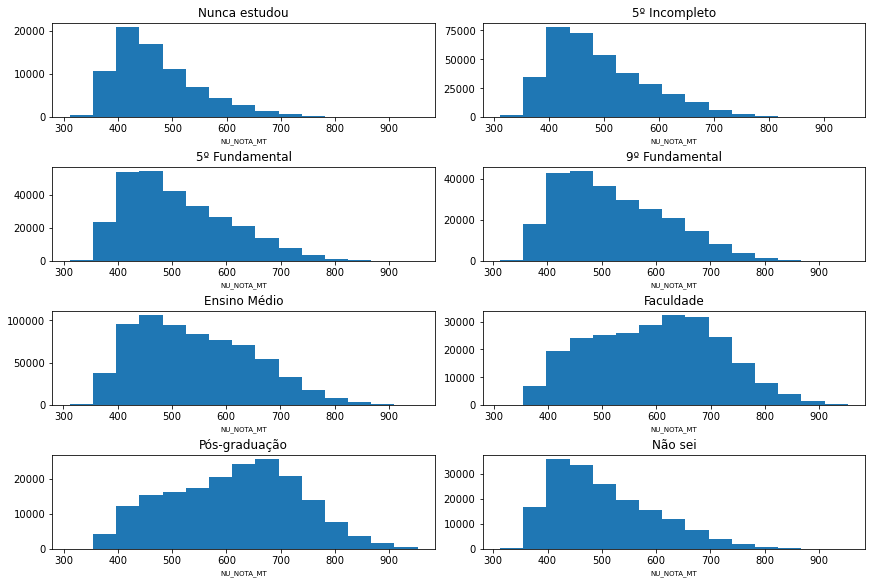




Avaliação da variação da Nota MT por Nível de Estudo do Responsável Mulher.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,48334.00,244411.00,227084.00,246321.00,797263.00,322102.00,310681.00,49194.00
count_%,2.15,10.89,10.11,10.97,35.51,14.35,13.84,2.19
mean,464.33,484.98,501.06,510.35,533.40,582.64,592.40,493.18
std,75.84,85.66,93.09,96.31,104.52,117.06,118.55,93.99
min,310.50,310.40,312.00,311.20,310.90,311.00,311.80,313.70
25%,409.30,420.10,428.70,434.30,448.00,485.30,494.40,421.90
50%,447.20,465.80,480.80,490.60,517.00,581.20,594.80,469.80
75%,502.40,533.90,558.90,573.20,607.90,670.10,680.80,546.10
max,953.10,948.50,953.10,953.10,953.10,953.10,953.10,948.80


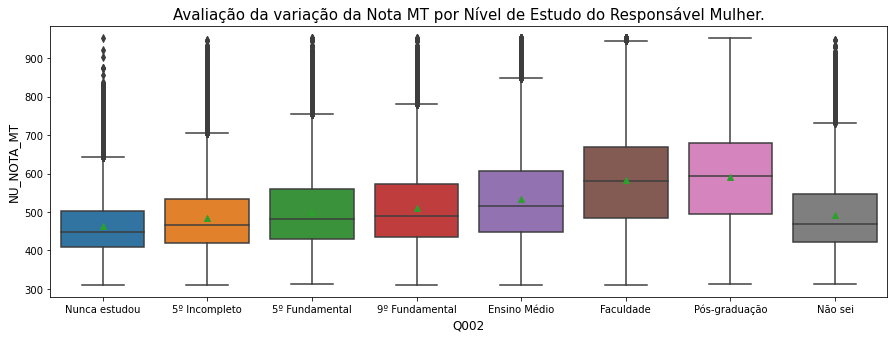

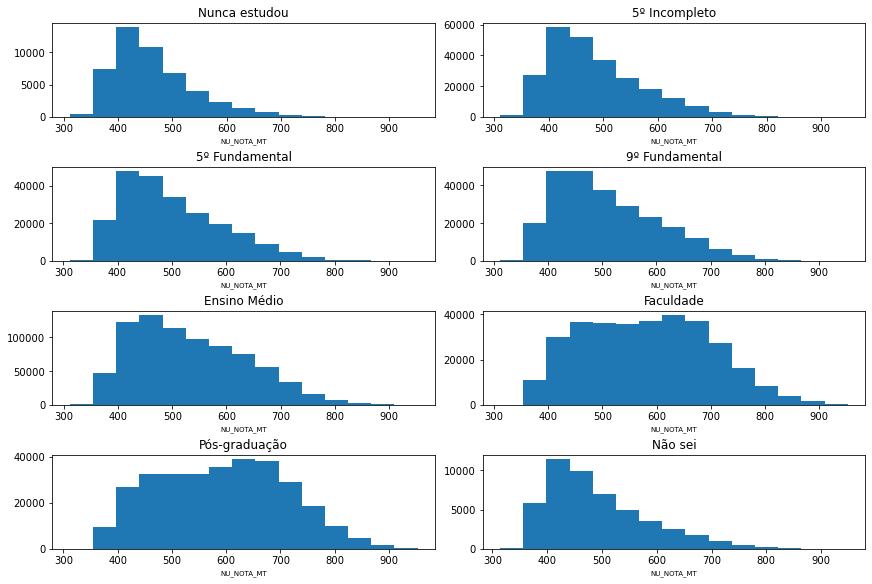




Avaliação da variação da Nota MT por Qtd de Residentes.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,48145.00,269161.00,614660.00,798977.00,343249.00,107970.00,36941.00,14835.00,5558.00,3193.00,1097.00,705.00,298.00,181.00,124.00,61.00,31.00,33.00,22.00,149.00
count_%,2.14,11.99,27.37,35.58,15.29,4.81,1.65,0.66,0.25,0.14,0.05,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01
mean,532.75,530.82,539.01,543.51,528.08,511.28,498.29,488.97,482.53,477.42,478.12,472.88,472.92,488.39,476.92,481.77,479.41,483.95,481.79,502.28
std,114.07,108.92,110.30,112.42,108.38,101.68,95.72,90.26,87.55,85.87,87.50,81.59,79.81,97.57,83.43,89.06,88.14,98.29,104.15,127.11
min,311.50,311.70,310.90,310.50,311.00,312.30,313.80,310.40,318.40,319.70,345.60,329.80,348.00,315.50,360.40,357.50,360.50,365.30,362.40,353.80
25%,439.50,442.00,448.20,450.30,440.30,431.30,425.30,420.50,417.00,415.90,414.20,414.80,417.62,416.10,418.17,416.70,417.80,419.10,407.45,407.70
50%,511.20,510.50,521.10,526.10,506.50,487.55,475.20,467.70,462.55,457.70,455.80,450.60,458.00,465.10,451.70,461.00,457.90,459.40,449.45,450.70
75%,614.00,607.80,618.80,625.40,603.10,575.50,553.30,540.15,529.90,518.20,517.70,511.60,508.02,527.30,519.05,514.00,545.70,524.30,538.30,568.70
max,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,895.70,953.10,916.70,841.10,900.00,868.30,874.00,806.60,661.10,778.00,813.40,867.00


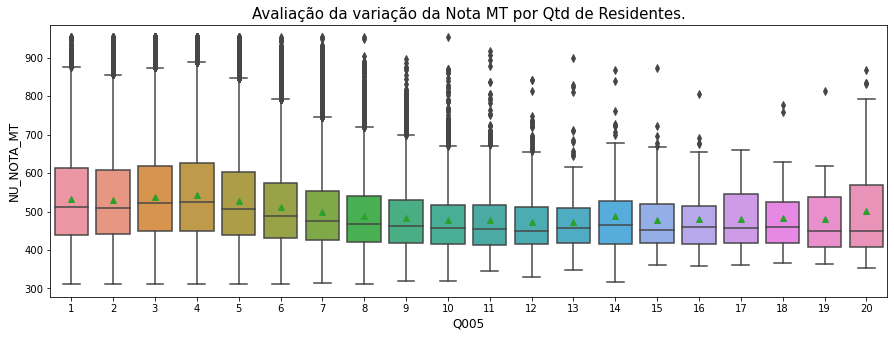

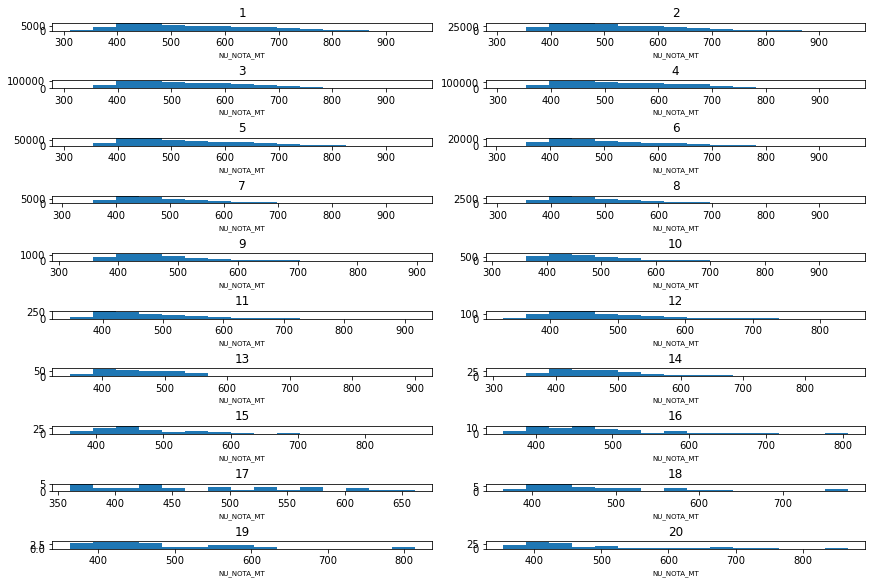




Avaliação da variação da Nota MT pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,113488.00,548896.00,347854.00,278500.00,144363.00,168455.00,148002.00,119067.00,75648.00,47079.00,37256.00,32650.00,48003.00,30127.00,32972.00,32920.00,40110.00
count_%,5.05,24.45,15.49,12.40,6.43,7.50,6.59,5.30,3.37,2.10,1.66,1.45,2.14,1.34,1.47,1.47,1.79
mean,470.31,484.97,509.49,524.11,542.10,551.31,568.97,583.56,594.31,603.09,609.56,614.60,623.39,632.45,639.87,648.20,662.59
std,78.55,84.11,93.22,98.15,103.08,104.71,108.30,110.73,112.33,112.91,113.74,113.94,114.43,114.70,114.04,114.80,115.40
min,311.60,310.40,311.70,311.20,310.90,311.20,312.10,314.70,323.70,328.10,319.40,333.80,347.00,353.80,353.80,330.10,353.80
25%,413.00,421.30,435.80,445.30,457.70,465.20,480.10,493.30,504.50,514.60,521.90,526.90,538.80,551.00,562.20,572.10,590.20
50%,451.90,466.20,492.20,508.80,531.00,543.00,566.10,585.60,598.30,609.70,617.70,622.90,633.30,643.00,650.50,661.30,674.60
75%,509.60,532.90,571.00,592.70,617.30,628.30,650.00,665.30,677.00,685.80,691.10,697.60,705.60,713.80,719.60,728.80,742.20
max,929.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10,953.10


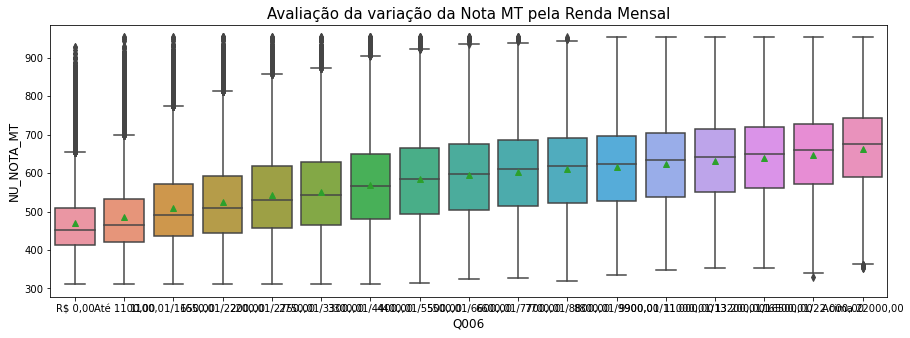

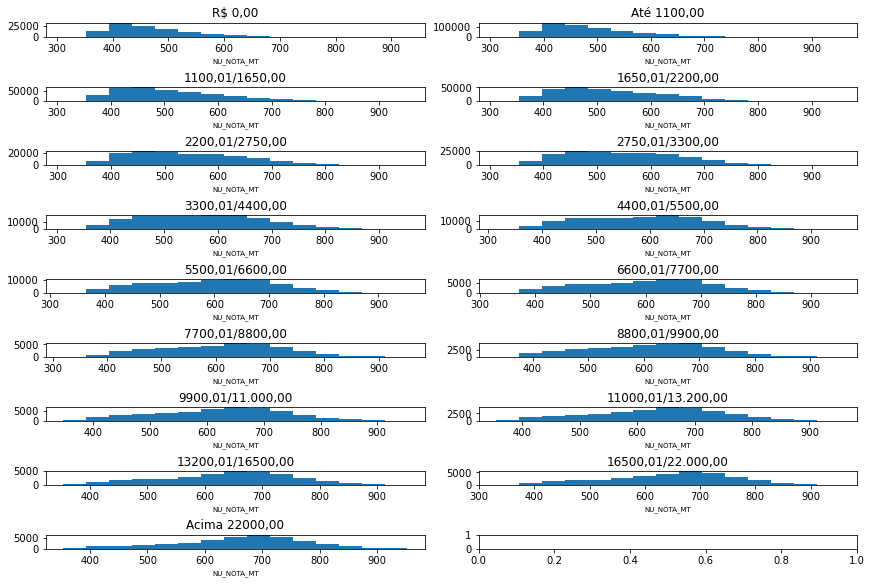




Avaliação da variação da Nota MT pela Qtd de Celulares na Residência


,0,1,2,3,4+
count,37475.00,320659.00,589729.00,716850.00,580677.00
count_%,1.67,14.28,26.26,31.93,25.86
mean,493.48,488.79,517.66,544.03,570.39
std,95.66,91.73,101.90,109.44,116.59
min,311.80,310.40,311.40,310.90,311.00
25%,421.70,420.10,436.50,453.70,472.40
50%,468.50,466.20,496.90,529.00,563.80
75%,544.80,538.30,585.50,623.80,657.40
max,948.50,953.10,953.10,953.10,953.10


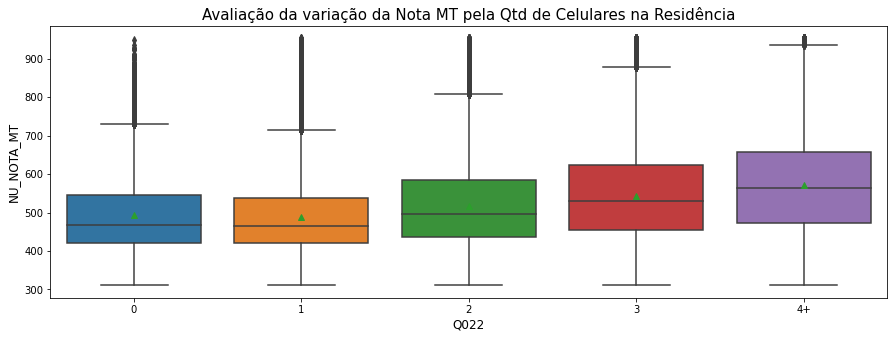

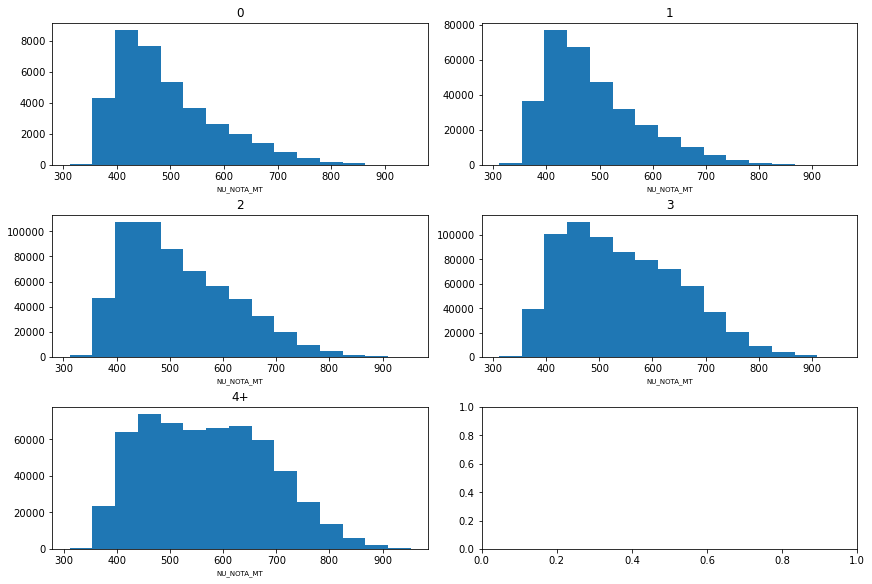




Avaliação da variação da Nota MT pela Qtd de Computadores na Residência


,0,1,2,3,4+
count,836379.00,956704.00,280037.00,113483.00,58787.00
count_%,37.25,42.61,12.47,5.05,2.62
mean,486.46,542.16,596.56,625.09,649.03
std,83.69,105.86,115.01,115.94,115.17
min,310.40,310.90,313.70,331.20,340.10
25%,422.60,455.00,504.10,539.50,573.10
50%,468.50,529.40,601.10,635.70,660.70
75%,535.60,619.60,681.20,707.70,729.20
max,948.80,953.10,953.10,953.10,953.10


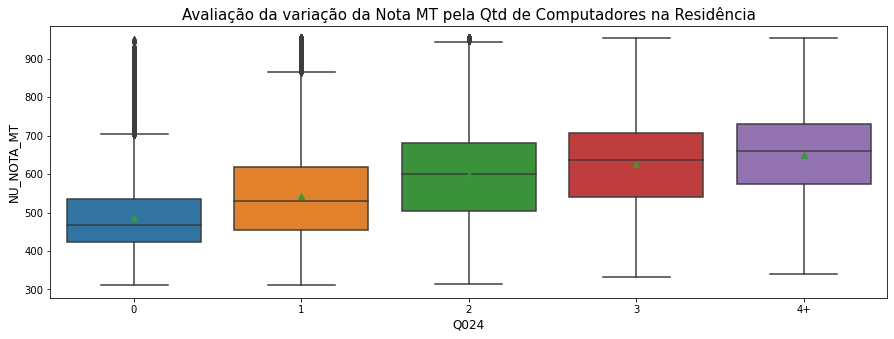

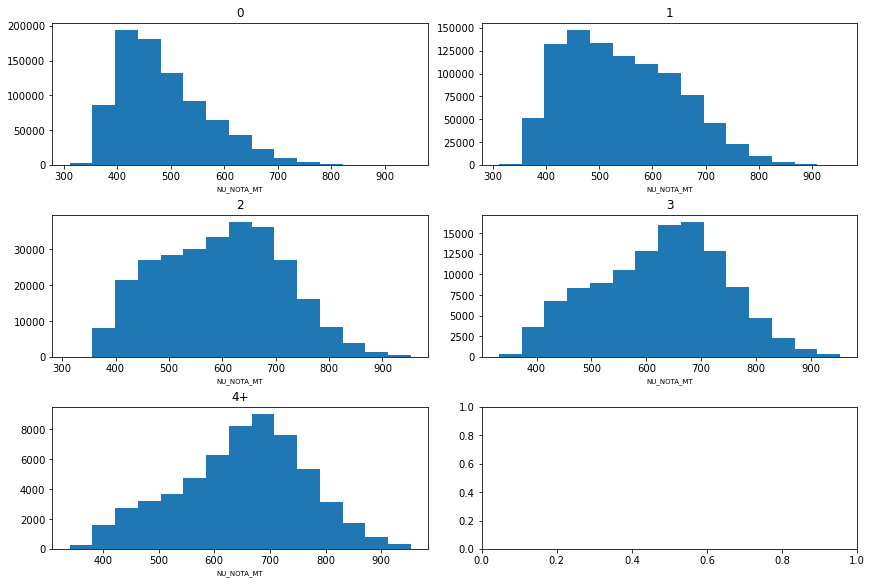




Avaliação da variação da Nota MT por Acesso a Internet na Residência


,NAO,SIM
count,190357.00,2055033.00
count_%,8.48,91.52
mean,471.84,541.06
std,77.18,111.15
min,311.40,310.40
25%,414.70,449.40
50%,454.60,523.50
75%,513.10,621.50
max,929.50,953.10


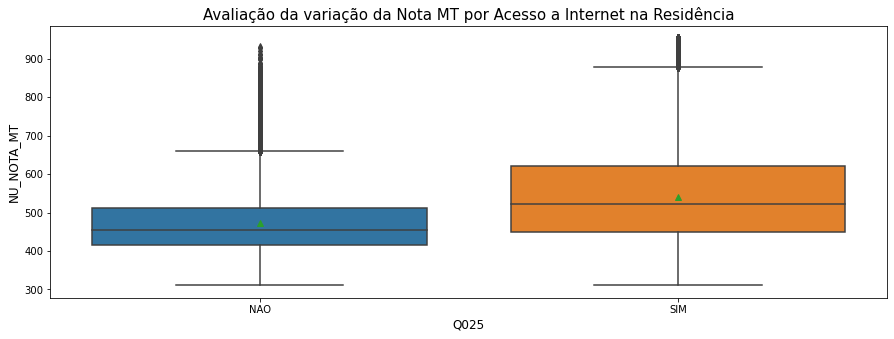

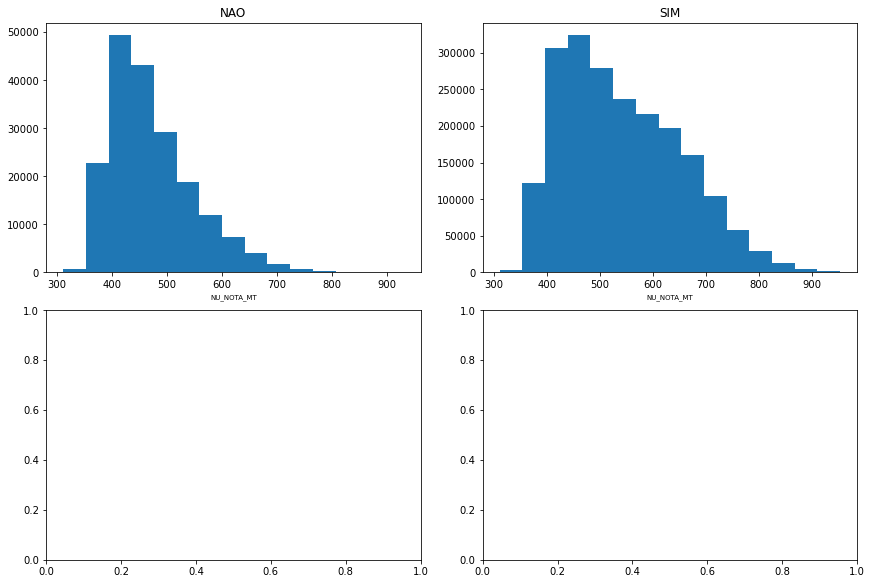

In [9]:
titulo = f'Avaliação da variação da Nota {nota} por Faixa Etária.'
coluna_1 = 'TP_FAIXA_ETARIA'                  # Clases
vrl_k = ['<17', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
         '56-60', '61-65', '66-70', '>70']
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = False
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Clases
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Raça'
coluna_1 = 'TP_COR_RACA'                  # Clases
Dicionario_Labels = {'Nao declarado':0, 'Branca':1, 'Preta':2, 'Parda':3, 'Amarela':4, 'Indigena':5, 'Nao dispoe da informacao':6}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Ano de Conclusão Ensino Médio.'
coluna_1 = 'TP_ANO_CONCLUIU'                  # Clases
vrl_k = ['Nao informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
         '2009', '2008', '2007', 'Antes 2007']
vrl_v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Escola Pública/Privada.'
coluna_1 = 'TP_ESCOLA'                  # Clases
Dicionario_Labels = {'Nao Respondeu':1, 'Publica':2, 'Privada':3}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por região da aplicação da prova.'
coluna_1 = 'SG_UF_PROVA'                  # Clases
Dicionario_Labels = {}
UF = sorted(base['SG_UF_PROVA'].unique())
for i in UF:
    Dicionario_Labels[i] = i
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Homem.'
coluna_1 = 'Q001'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Mulher.'
coluna_1 = 'Q002'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Qtd de Residentes.'
coluna_1 = 'Q005'                  # Clases
vrl_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Clases
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Celulares na Residência'
coluna_1 = 'Q022'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Computadores na Residência'
coluna_1 = 'Q024'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Acesso a Internet na Residência'
coluna_1 = 'Q025'                  # Clases
Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()